In [1]:
import torch
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from sac import Agent
from IPython import display
from collections import deque
%matplotlib inline

In [2]:
# load the environment || LunarLander-v2 Continuous ||
env = gym.make('LunarLander-v2', continuous=True, render_mode='rgb_array')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_low = env.action_space.low
action_high = env.action_space.high

In [3]:
print('State Dimensions: ', state_dim)
print('Action Dimensions: ', action_dim)
print('Action Low: ', action_low)
print('Action High: ', action_high)

State Dimensions:  8
Action Dimensions:  2
Action Low:  [-1. -1.]
Action High:  [1. 1.]


In [4]:
# Set Up Agent
agent = Agent(state_size=state_dim, action_size=action_dim, action_low=action_low, action_high=action_high)

In [5]:
# Random Agent
display_viz = False
state = env.reset()[0]
for eps in range(1):
    score = 0
    while True:
        action = agent.act(state)
        action = agent.action_adapter(action)
        
        if display_viz:
            #render image
            rgb_array = env.render()
            #plot image
            display.clear_output(wait=True)
            plt.imshow(rgb_array)
            plt.show()
        next_state, reward, done, truncated, _ = env.step(action)
        score += reward
        terminated = done or truncated
        if terminated:
            break
        
        state = next_state
        
env.close()
print('Score: ', score)

Score:  -31.11735538453388


In [6]:
# Train Agent
display_viz = False

scores = []
scores_window = deque(maxlen=100)

num_episodes = 2000

for eps in range(1, num_episodes+1):
    state = env.reset()[0]
    score = 0
    
    while True:
        action = agent.act(state) # get action from agent, 0 index to remove dimension
        action = agent.action_adapter(action) # convert action to environment action space
        
        next_state, reward, done, truncated, _ = env.step(action)
        done = done or truncated
        
        # reward shaping
        if reward <= -100:
            reward = -10
        
        # update score
        score += reward
        
        # agent step    
        agent.step(state, action, reward, next_state, done)
        
        if done:
            break
        
        state = next_state
        
    scores.append(score)
    scores_window.append(score)
    
    print('\rEpisode {}\tAverage Score: {:.2f} \tTotal steps: {}'.format(eps, np.mean(scores_window), agent.step_counter), end="")
    
    if eps % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(eps, np.mean(scores_window)))
        
    if np.mean(scores_window)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(eps-100, np.mean(scores_window)))
        break
    
env.close()
        


Episode 100	Average Score: 117.95 	Total steps: 32468
Episode 130	Average Score: 200.28 	Total steps: 42242
Environment solved in 30 episodes!	Average Score: 200.28


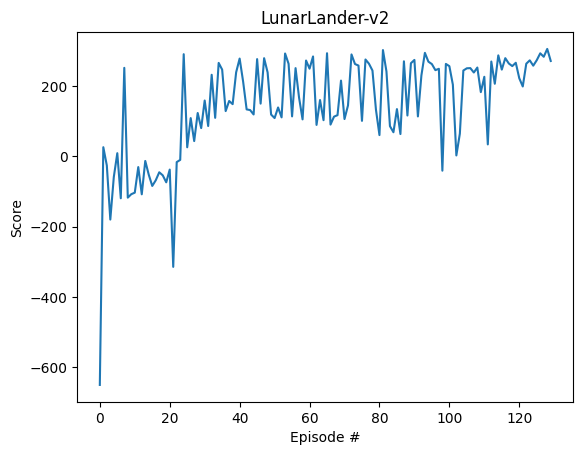

In [7]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('LunarLander-v2')
plt.show()

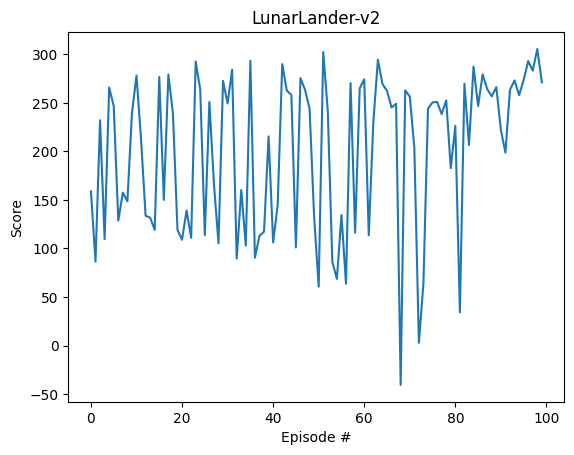

In [8]:
# plot the running average over 100 episodes
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_window)), scores_window)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('LunarLander-v2')
plt.show()